In [86]:
# necessary imports
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [9]:
df = pd.read_json('business.json', lines=True)

In [11]:
# Visualize the columns of the data
df.columns.values

array(['address', 'attributes', 'business_id', 'categories', 'city',
       'hours', 'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state'], dtype=object)

In [14]:
# View the type of each column and more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174567 entries, 0 to 174566
Data columns (total 15 columns):
address         174567 non-null object
attributes      174567 non-null object
business_id     174567 non-null object
categories      174567 non-null object
city            174567 non-null object
hours           174567 non-null object
is_open         174567 non-null int64
latitude        174566 non-null float64
longitude       174566 non-null float64
name            174567 non-null object
neighborhood    174567 non-null object
postal_code     174567 non-null object
review_count    174567 non-null int64
stars           174567 non-null float64
state           174567 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.3+ MB


In [53]:
# Count the number of unique cities involved and display top 5
df['city'].value_counts(dropna=False).head()

Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: city, dtype: int64

We notice from this that the city with the most reviews in the dataset is Las Vegas.

In [87]:
# Find the average star rating in each city
average_cities = df.groupby('city').mean().reset_index()
average_cities_sorted = average_cities[['city','stars']].sort_values('stars')
average_cities_sorted.head()

,city,stars
428,Las Vegas Nevada,1.0
417,Lake Norman,1.0
118,Canonsburd,1.0
859,"Scarborough,",1.0
987,Totronto,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1189c1320>]], dtype=object)

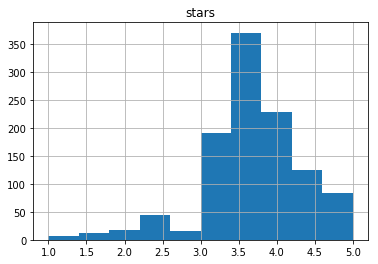

In [104]:
# A histogram describing the frequency of a certain star rating average
average_cities_sorted.hist('stars')

In [130]:
# Now let's find the average star rating by state. This could give the business owner an idea of which state is 
# lacking and gives a window of opportunity
average_state = df.groupby('state').count().reset_index()
average_state.head()

,state,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars
0,,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,01,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,30,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,6,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [131]:
# From the above, we can see that the by state data is very messy. We need to get rid of the data from unknown states
# We can do this by creating a list of a states, and then deleting any row that doesn't have one of those states
# in that row

states_list = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

cleaned_states = df[df.state.isin(states_list)]
cleaned_states.state.head()

0    AZ
1    PA
2    AZ
3    AZ
4    OH
Name: state, dtype: object

In [167]:
# Much better, now let's try the count again
state_reviews = cleaned_states.groupby('state').sum().sort_values('review_count')[['review_count']]
state_reviews

,review_count
state,
MN,3
VA,3
GA,3
KY,3
NE,4
WA,4
DE,5
CO,6
VT,8


From this we can see that the state with the most reviews is Nevada followed by Arizona and North Carolina

In [158]:
# Now we want to find the average number of stars for each state
average_stars = cleaned_states.groupby('state').mean()[['stars']]
average_stars.head()

,stars
state,
AK,2.500000
AL,5.000000
AR,3.250000
AZ,3.728722
CA,4.300000


This shows the average amount of stars for each state

In [164]:
# Let's combine both tables now so that we can compare the average vs. the amount of reviews for each state
review_stars = pd.concat([state_reviews, average_stars], axis=1)
review_stars = review_stars.sort_values('review_count')
review_stars

,review_count,stars
MN,3,3.500000
VA,3,4.000000
GA,3,5.000000
KY,3,4.500000
NE,4,4.000000
WA,4,4.000000
DE,5,4.000000
CO,6,3.750000
VT,8,4.250000
AL,10,5.000000


# Study the type of cuisine per city

In [98]:
df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA
2,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ
3,"5000 Arizona Mills Cr, Ste 435","{'BusinessAcceptsCreditCards': True, 'Restaura...",8DShNS-LuFqpEWIp0HxijA,"[Sporting Goods, Shopping]",Tempe,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",0,33.383147,-111.964725,Sports Authority,,85282,9,3.0,AZ
4,581 Howe Ave,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",PfOCPjBrlQAnz__NXj9h_w,"[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...",1,41.119535,-81.475690,Brick House Tavern + Tap,,44221,116,3.5,OH


{'Friday': '7:30-17:00',
 'Tuesday': '7:30-17:00',
 'Thursday': '7:30-17:00',
 'Wednesday': '7:30-17:00',
 'Monday': '7:30-17:00'}